# Prediction of Mortality Rates for Cardiovascular Disease, Cancer, Diabetes, and Chronic Respiratory Diseases in the Population of Ireland

## The Dataset : Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease  Dataset- (G0315)

In [1]:
#Importing all the necessary libraries for Data Cleaning,Data Visualization, Data Preparation, Statistical analysis and Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# suppressing any warning messages
import warnings
warnings.filterwarnings('ignore') 

In [3]:
#Import the csv Dataset
colnames = ['Statistic Label', 'Area of Residence', 'ICD 10 Diagnostic Group','Year','UNIT','Mortality Rate(per 1000)']
pop_data = pd.read_csv("G0315.20231020T111006.csv", header=0, names = colnames)

# Early Data  Analysis (EDA)

This process involves:-

a) View the first and last few observations of the pop_data dataset

b) View the number of observations and variables the pop_data dataset has

c) View the entire pop_data dataset to check the data types and any missing data in a particluar variable.

d) Check for any outliers

e) perform summary statistics for categorical and numeric varaibles

f) Visualize the data

In [4]:
#View the pop_data
pop_data

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
0,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2007,No. per 1000 Pop.,1.87
1,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2008,No. per 1000 Pop.,1.90
2,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2009,No. per 1000 Pop.,1.91
3,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2010,No. per 1000 Pop.,1.83
4,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2011,No. per 1000 Pop.,1.94
...,...,...,...,...,...,...
1887,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2013,No. per 1000 Pop.,0.35
1888,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2014,No. per 1000 Pop.,0.39
1889,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2015,No. per 1000 Pop.,0.36
1890,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2016,No. per 1000 Pop.,0.38


In [5]:
#View the pop_data column names, variables data types and missing data points
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1892 non-null   object 
 1   Area of Residence         1892 non-null   object 
 2   ICD 10 Diagnostic Group   1892 non-null   object 
 3   Year                      1892 non-null   int64  
 4   UNIT                      1892 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 88.8+ KB


### Findings
1. The data has some columns that i will not use (statistic label, unit), I will drop them.
2. The variables need to be encoded.
3. The data has missing data points from the mortality rate variable.

In [6]:
#View the first 5 observations of the pop_data dataset
pop_data.head()

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
0,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2007,No. per 1000 Pop.,1.87
1,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2008,No. per 1000 Pop.,1.90
2,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2009,No. per 1000 Pop.,1.91
3,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2010,No. per 1000 Pop.,1.83
4,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2011,No. per 1000 Pop.,1.94


### Findings
The data has a category called state that is an average mortality rate of all states per year per ICD Diagnosis disease group

In [7]:
#View the last 5 observations of the pop_data dataset
pop_data.tail()

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
1887,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2013,No. per 1000 Pop.,0.35
1888,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2014,No. per 1000 Pop.,0.39
1889,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2015,No. per 1000 Pop.,0.36
1890,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2016,No. per 1000 Pop.,0.38
1891,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2017,No. per 1000 Pop.,NaN


In [8]:
#Check the number of observations and variables the pop_data dataset has
pop_data.shape

(1892, 6)

In [9]:
#Determine the summary statistics for the numerical variables and transpose the values for better readability
pop_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1892.0,2012.0,3.163114,2007.0,2009.00,2012.00,2015.0,2017.00
Mortality Rate(per 1000),1720.0,1.3,0.776092,0.1,0.57,1.17,2.0,3.92


In [10]:
#Determine the summary statistics for the categorical variables and transpose the values for better readability
pop_data.describe(include = 'object').transpose()

,count,unique,top,freq
Statistic Label,1892,1,Mortality rate attributed to cardiovascular di...,1892
Area of Residence,1892,43,State,44
ICD 10 Diagnostic Group,1892,4,Neoplasms,473
UNIT,1892,1,No. per 1000 Pop.,1892


In [11]:
#summing all the missing data in each variable
pop_data.isnull().sum()

Statistic Label               0
Area of Residence             0
ICD 10 Diagnostic Group       0
Year                          0
UNIT                          0
Mortality Rate(per 1000)    172
dtype: int64

### Findings
The Mortality rate variable has 172 missing data points

In [12]:
#Checking for Duplicates in the pop_data dataset
pop_data.duplicated().sum()

0

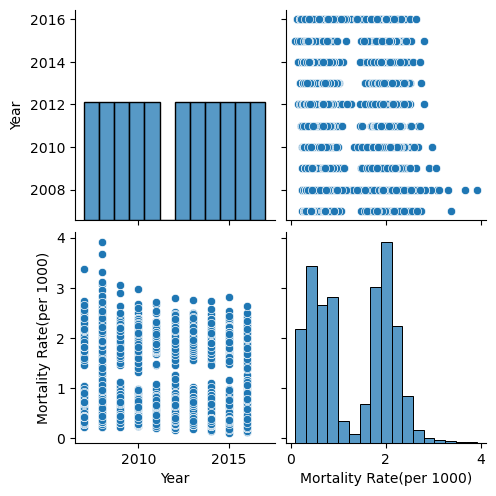

In [13]:
#Visualize the data using seaborn to get an idea of how the pop_data looks like (check for any outliers)
sns.pairplot(pop_data);

<Axes: >

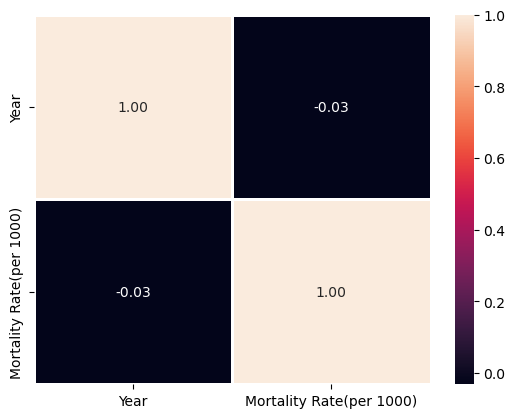

In [14]:
#Plot a Heatmap for the correlation of the pop_data dataset 
import seaborn as sns
sns.heatmap(pop_data.corr(), annot = True, fmt = '.2f', linewidths = 2)

### Findings
There is a weak negative correlation between year and Mortality rate

## Checking for Outliers

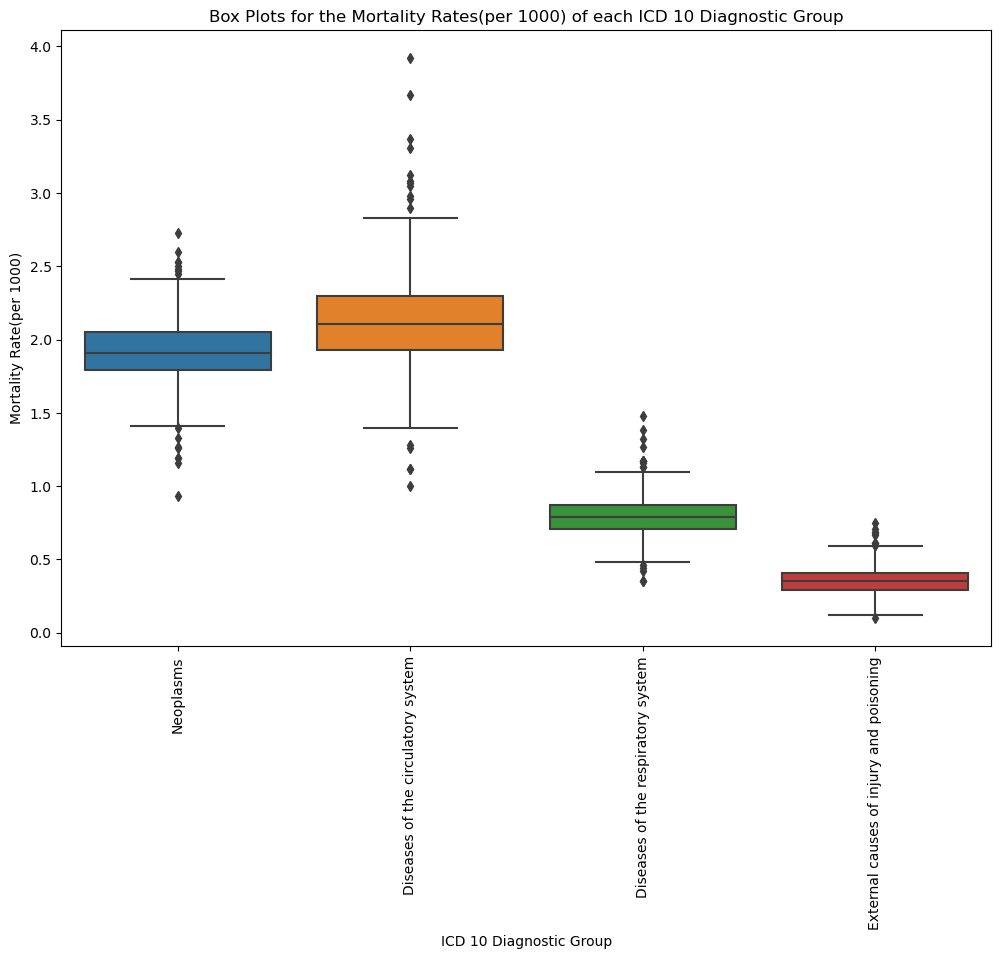

In [15]:
#Visualize the mortality rate of each ICD 10 Diagnostic Group using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='ICD 10 Diagnostic Group', y='Mortality Rate(per 1000)', data=pop_data)
plt.xticks(rotation=90)
plt.xlabel('ICD 10 Diagnostic Group')
plt.ylabel('Mortality Rate(per 1000)')
plt.title('Box Plots for the Mortality Rates(per 1000) of each ICD 10 Diagnostic Group')

plt.show()


### Findings
The four diseases all have outliers 

# Data Preprocessing¶
This process involved the following steps:-

a) Handling Missing Data

b) Handling Duplicates if any

c) Encoding categorical variables

d)Drop the irrelevant row called state

e)Dropping some area of residence(Border, Midland, West, Dublin, Mid-East, Mid-West, South-East, South-West)

f) Handling outliers

## Handling Missing Data
I Decided to drop the missing mortality rates for the year 2017, because they are missing for the entire year.

In [16]:
#Dropping missing values of the mortality rate for the year 2017. The whole year is missing the mortality rate values
pop_data = pop_data.dropna(axis = 0)

In [17]:
#Checking number of observations in the pop_data dataset after dropping the missing mortality rate observations
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 1890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1720 non-null   object 
 1   Area of Residence         1720 non-null   object 
 2   ICD 10 Diagnostic Group   1720 non-null   object 
 3   Year                      1720 non-null   int64  
 4   UNIT                      1720 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.1+ KB


In [18]:
#reset the index of the pop_data dataset after dropping 172 missing observations and check if they have been dropped
pop_data = pop_data.reset_index(drop=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1720 non-null   object 
 1   Area of Residence         1720 non-null   object 
 2   ICD 10 Diagnostic Group   1720 non-null   object 
 3   Year                      1720 non-null   int64  
 4   UNIT                      1720 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 80.8+ KB


In [19]:
#check if there is any missing values after dropping the ones that were missing
pop_data.isnull().values.any()

False

## Handling Variables that will not be used
I dropped variables that i'll not use

In [20]:
#Drop variables that i will not use.
pop_data = pop_data.drop([ 'Statistic Label','UNIT'], axis =1)

In [21]:
#reset the index of the pop_data dataset after dropping the variables that i will not use and check if they have been dropped
pop_data = pop_data.reset_index(drop=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1720 non-null   object 
 1   ICD 10 Diagnostic Group   1720 non-null   object 
 2   Year                      1720 non-null   int64  
 3   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.9+ KB


### Drop the state category because it's the average of all states per year per area of residence

In [22]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for each area of residence
pop_data = pop_data[pop_data["Area of Residence"]!= "State"]

#View the pop_data dataset after dropping the area of residence above
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000)
40,Carlow,Neoplasms,2007,1.91
41,Carlow,Neoplasms,2008,2.02
42,Carlow,Neoplasms,2009,2.17
43,Carlow,Neoplasms,2010,1.72
44,Carlow,Neoplasms,2011,2.33
...,...,...,...,...
1715,South-West,External causes of injury and poisoning,2012,0.41
1716,South-West,External causes of injury and poisoning,2013,0.35
1717,South-West,External causes of injury and poisoning,2014,0.39
1718,South-West,External causes of injury and poisoning,2015,0.36


In [23]:
#reset the index of the pop_data dataset after dropping state category of area of residence and check if they have been dropped
pop_data = pop_data.reset_index(drop=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1680 non-null   object 
 1   ICD 10 Diagnostic Group   1680 non-null   object 
 2   Year                      1680 non-null   int64  
 3   Mortality Rate(per 1000)  1680 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 52.6+ KB


### Dropping these area of residence(Border, Midland, West, Dublin, Mid-East, Mid-West, South-East, South-West) because they are provinces names for the area of residence below
Border – Cavan, Donegal, Leitrim, Louth, Monaghan, Sligo.

Midland – Laois, Longford, Offaly, Westmeath.

West – Galway, Mayo, Roscommon.

Dublin – Dublin City, Dún Laoghaire-Rathdown, Fingal, South Dublin.

Mid-East – Kildare, Meath, Wicklow.

Mid-West – Clare, Limerick, North Tipperary.

South-East – Carlow, Kilkenny, South Tipperary, Waterford, Wexford.

South-West – Cork, Kerry.

In [24]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the Border province
pop_data = pop_data[pop_data["Area of Residence"]!= "Border"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1640 non-null   object 
 1   ICD 10 Diagnostic Group   1640 non-null   object 
 2   Year                      1640 non-null   int64  
 3   Mortality Rate(per 1000)  1640 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.1+ KB


In [25]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the midland province
pop_data = pop_data[pop_data["Area of Residence"]!= "Midland"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1600 non-null   object 
 1   ICD 10 Diagnostic Group   1600 non-null   object 
 2   Year                      1600 non-null   int64  
 3   Mortality Rate(per 1000)  1600 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.5+ KB


In [26]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the west province
pop_data = pop_data[pop_data["Area of Residence"]!= "West"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1560 non-null   object 
 1   ICD 10 Diagnostic Group   1560 non-null   object 
 2   Year                      1560 non-null   int64  
 3   Mortality Rate(per 1000)  1560 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 60.9+ KB


In [27]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the Dublin province
pop_data = pop_data[pop_data["Area of Residence"]!= "Dublin"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1520 non-null   object 
 1   ICD 10 Diagnostic Group   1520 non-null   object 
 2   Year                      1520 non-null   int64  
 3   Mortality Rate(per 1000)  1520 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 59.4+ KB


In [28]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the mid-east province
pop_data = pop_data[pop_data["Area of Residence"]!= "Mid-East"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1480 non-null   object 
 1   ICD 10 Diagnostic Group   1480 non-null   object 
 2   Year                      1480 non-null   int64  
 3   Mortality Rate(per 1000)  1480 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 57.8+ KB


In [29]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the Mid-West province
pop_data = pop_data[pop_data["Area of Residence"]!= "Mid-West"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1440 non-null   object 
 1   ICD 10 Diagnostic Group   1440 non-null   object 
 2   Year                      1440 non-null   int64  
 3   Mortality Rate(per 1000)  1440 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 56.2+ KB


In [30]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the south-east province
pop_data = pop_data[pop_data["Area of Residence"]!= "South-East"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1400 non-null   object 
 1   ICD 10 Diagnostic Group   1400 non-null   object 
 2   Year                      1400 non-null   int64  
 3   Mortality Rate(per 1000)  1400 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 54.7+ KB


In [31]:
#Drop the state category from Area of Residence because it's the average of mortality rate per year for the area of residence that are part of the south-west province
pop_data = pop_data[pop_data["Area of Residence"]!= "South-West"]
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1360 non-null   object 
 1   ICD 10 Diagnostic Group   1360 non-null   object 
 2   Year                      1360 non-null   int64  
 3   Mortality Rate(per 1000)  1360 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [32]:
#reset the index of the pop_data dataset after dropping the area of residence( state,Border, Midland, West, Dublin, Mid-East, Mid-West, South-East, South-West) category and check if they have been dropped
pop_data = pop_data.reset_index(drop=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1360 non-null   object 
 1   ICD 10 Diagnostic Group   1360 non-null   object 
 2   Year                      1360 non-null   int64  
 3   Mortality Rate(per 1000)  1360 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.6+ KB


In [33]:
#View the pop_data dataset after dropping the area of residence categories above
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000)
0,Carlow,Neoplasms,2007,1.91
1,Carlow,Neoplasms,2008,2.02
2,Carlow,Neoplasms,2009,2.17
3,Carlow,Neoplasms,2010,1.72
4,Carlow,Neoplasms,2011,2.33
...,...,...,...,...
1355,Monaghan,External causes of injury and poisoning,2012,0.44
1356,Monaghan,External causes of injury and poisoning,2013,0.41
1357,Monaghan,External causes of injury and poisoning,2014,0.41
1358,Monaghan,External causes of injury and poisoning,2015,0.37


In [34]:
#View the pop_data dataset shape after dropping some variables and observations
pop_data.shape

(1360, 4)

In [35]:
#Check the available area of residence categories after cleaning it
pop_data["Area of Residence"].unique()

array(['Carlow', 'Dublin City', 'South Dublin', 'Fingal',
       'Dun Laoghaire-Rathdown', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City', 'Cork County', 'Kerry',
       'Limerick City', 'Limerick County', 'North Tipperary',
       'South Tipperary', 'Waterford City', 'Waterford County',
       'Galway City', 'Galway County', 'Leitrim', 'Mayo', 'Roscommon',
       'Sligo', 'Cavan', 'Donegal', 'Monaghan'], dtype=object)

## Handling Outliers

I chose to keep the outliers because they were influential outliers, i.e correct values that are ata distant from the other data points that are neither error nor interesting outliers.

# Data Visualization after Data Cleaning

For Data Visualization these are some of the questions i was trying to answer.
1. Which year had the highest mortality rate for each disease?
2. What is the mortality trend of each disease over the years?
3. What is the mortality trend of each disease over the years?

### 1. Which year had the highest mortality rate for each disease?

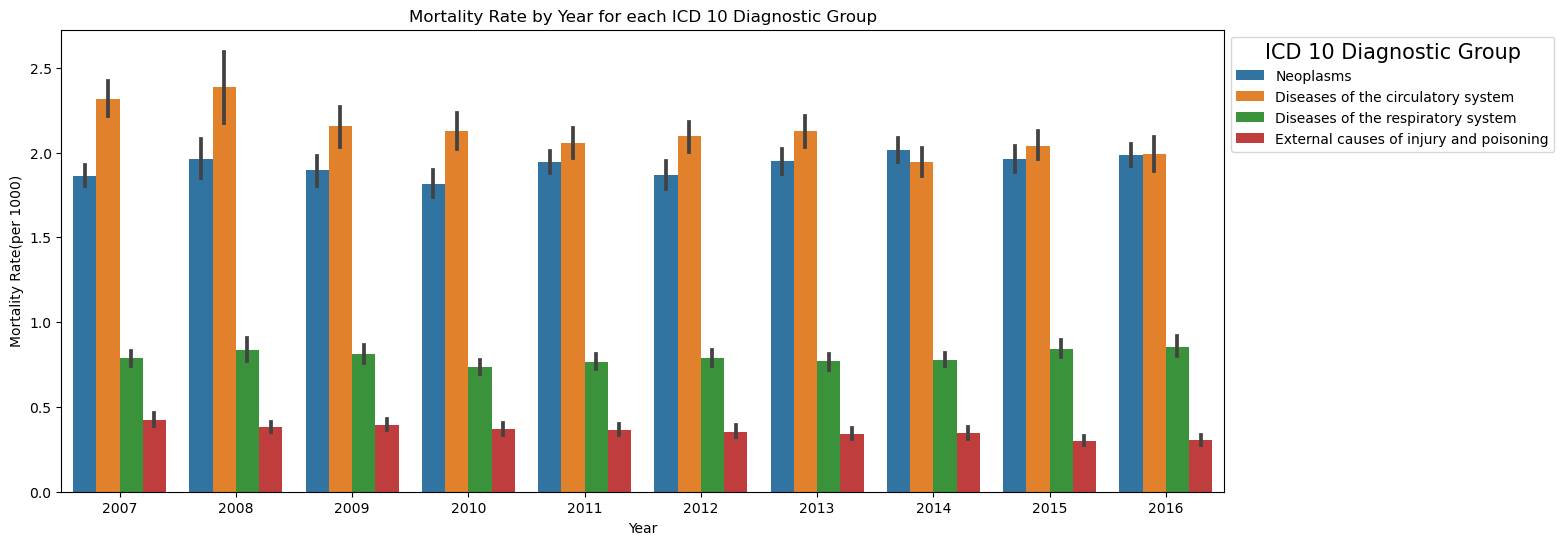

In [36]:
# Visualize the mortality rate of each ICD 10 Diagnostic group for each year using barplots
plt.figure(figsize=(15, 6))
sns.barplot(x="Year", y="Mortality Rate(per 1000)", hue="ICD 10 Diagnostic Group", data=pop_data)
plt.title('Mortality Rate by Year for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Findings
- The diseases of the circulatory system had the highest mortality rate over the 10 years.
- External causes of injury and poisoning had the lowest mortality rate over the 10 years.

### 2. What is the mortality trend of each disease over the years?

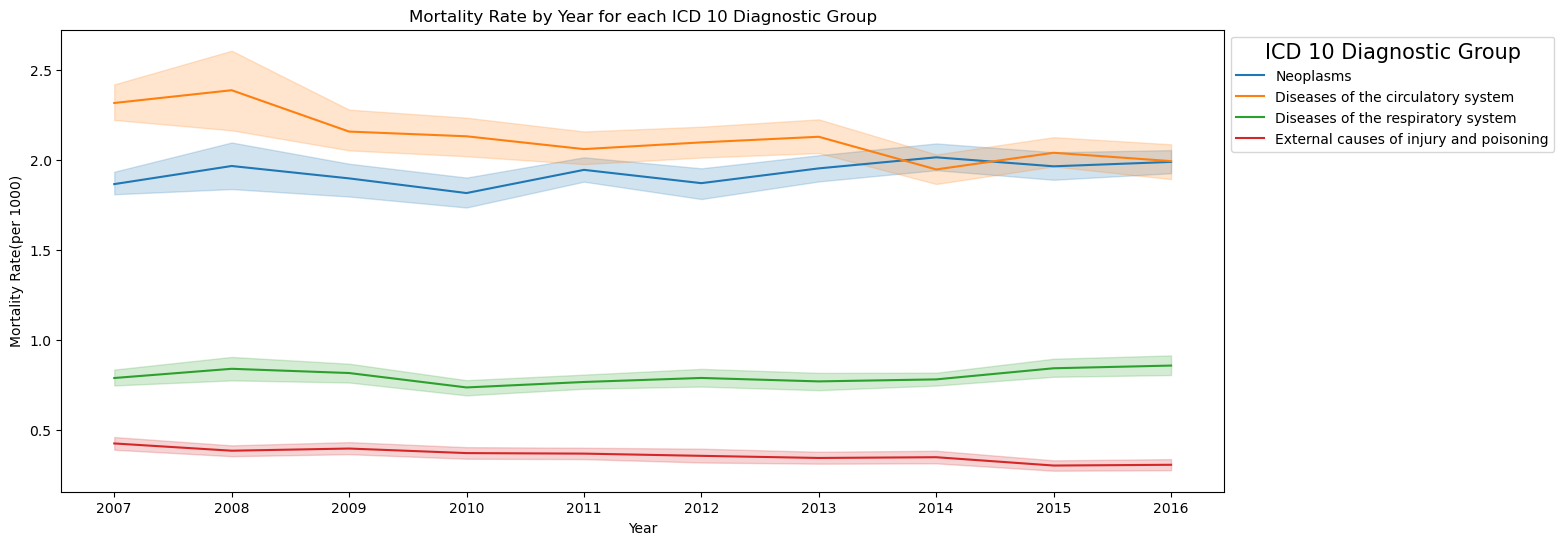

In [37]:
#Visualize the mortality rate trend of each ICD 10 Diagnostic Group over the years using line plots
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="Year", y="Mortality Rate(per 1000)", hue="ICD 10 Diagnostic Group", data=pop_data)
plt.title('Mortality Rate by Year for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticks(pop_data['Year'].unique())

plt.show()

### Findings
- The mortality rate of the diseases of the circulatory system is decreasing over the years.
- The mortality rate of neoplasms increases over the years
- The mortality rate of diseases of the respiratory system decreases then increases over the years.
- The mortality rate of external causes of injury and poisoning decreases over the years
- The mortality rate of the diseases of circulatory system and neoplasms are very high compared to diseases of the respiratory system and external causes of injury and poisoning

### 3. What is the mortality rate for each ICD 10 Diagnostic group by Area of Residence

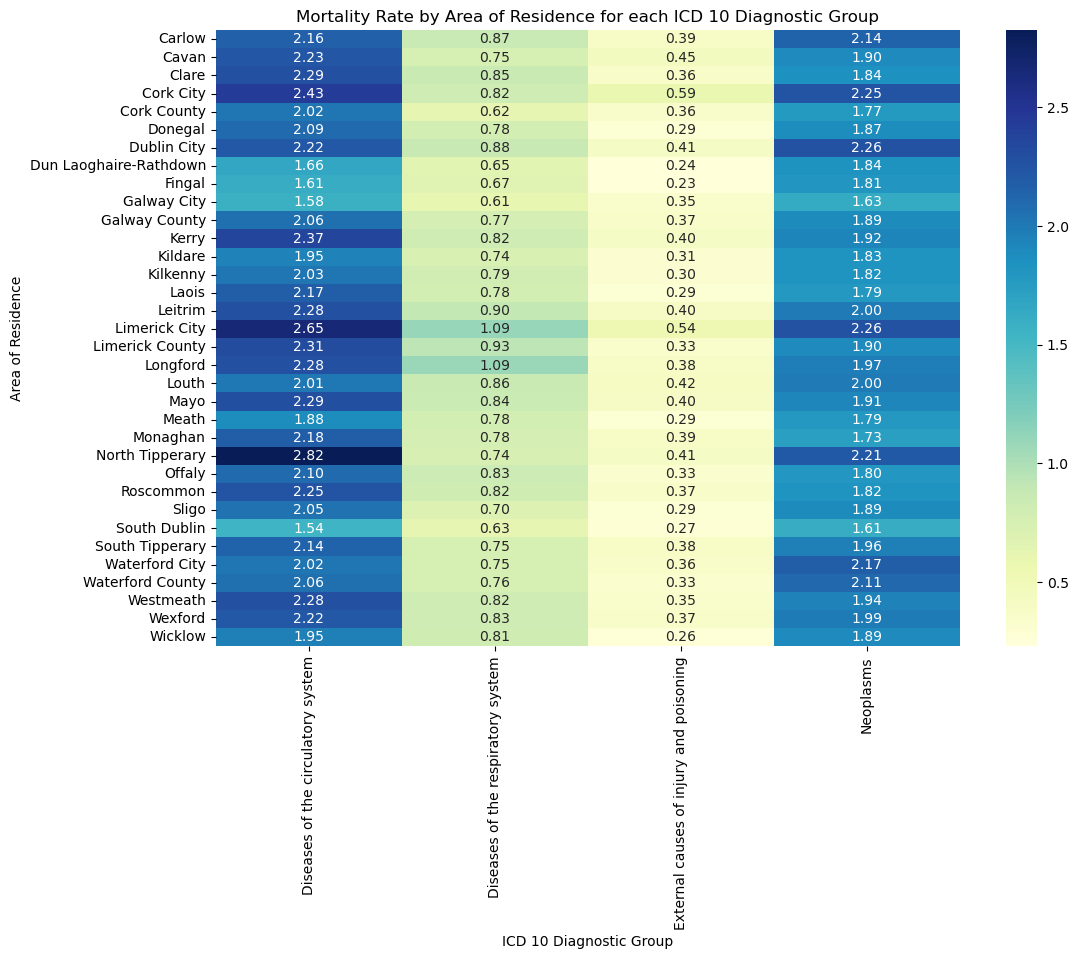

In [38]:
# Visualize the mortality rate of each ICD 10 Diagnostic group for each area of residence using a heatmap
# Create a pivot table for the Area of residence and ICD Diagnostic group
pivot_data = pop_data.pivot_table(index='Area of Residence', columns='ICD 10 Diagnostic Group', values='Mortality Rate(per 1000)')

# Create the heatmap from the pivot_data
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Mortality Rate by Area of Residence for each ICD 10 Diagnostic Group')
plt.show()

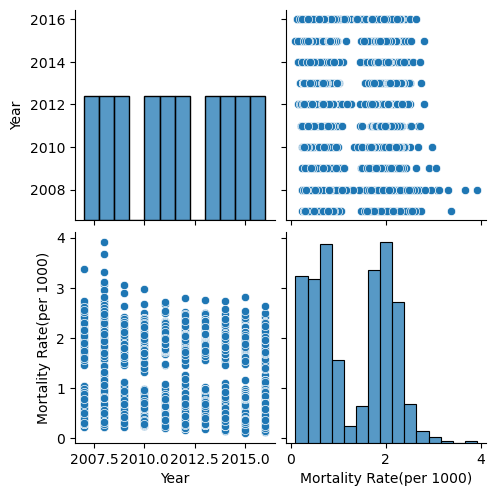

In [39]:
#Visualize the entire pop_data using pairplot
sns.pairplot(pop_data);

<Axes: >

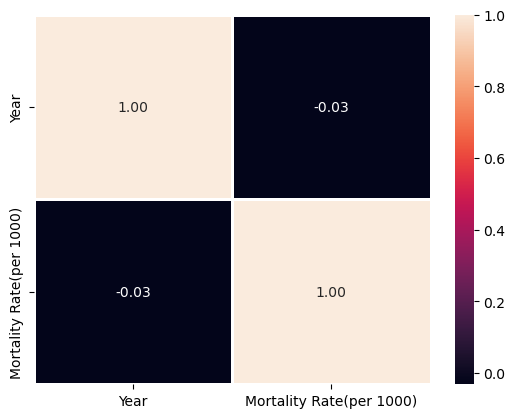

In [40]:
#Visualize the entire pop_data using a Heatmap
sns.heatmap(pop_data.corr(), annot = True, fmt = '.2f', linewidths = 2)

### Findings
- There is a weak negative correlation between year and mortality rate

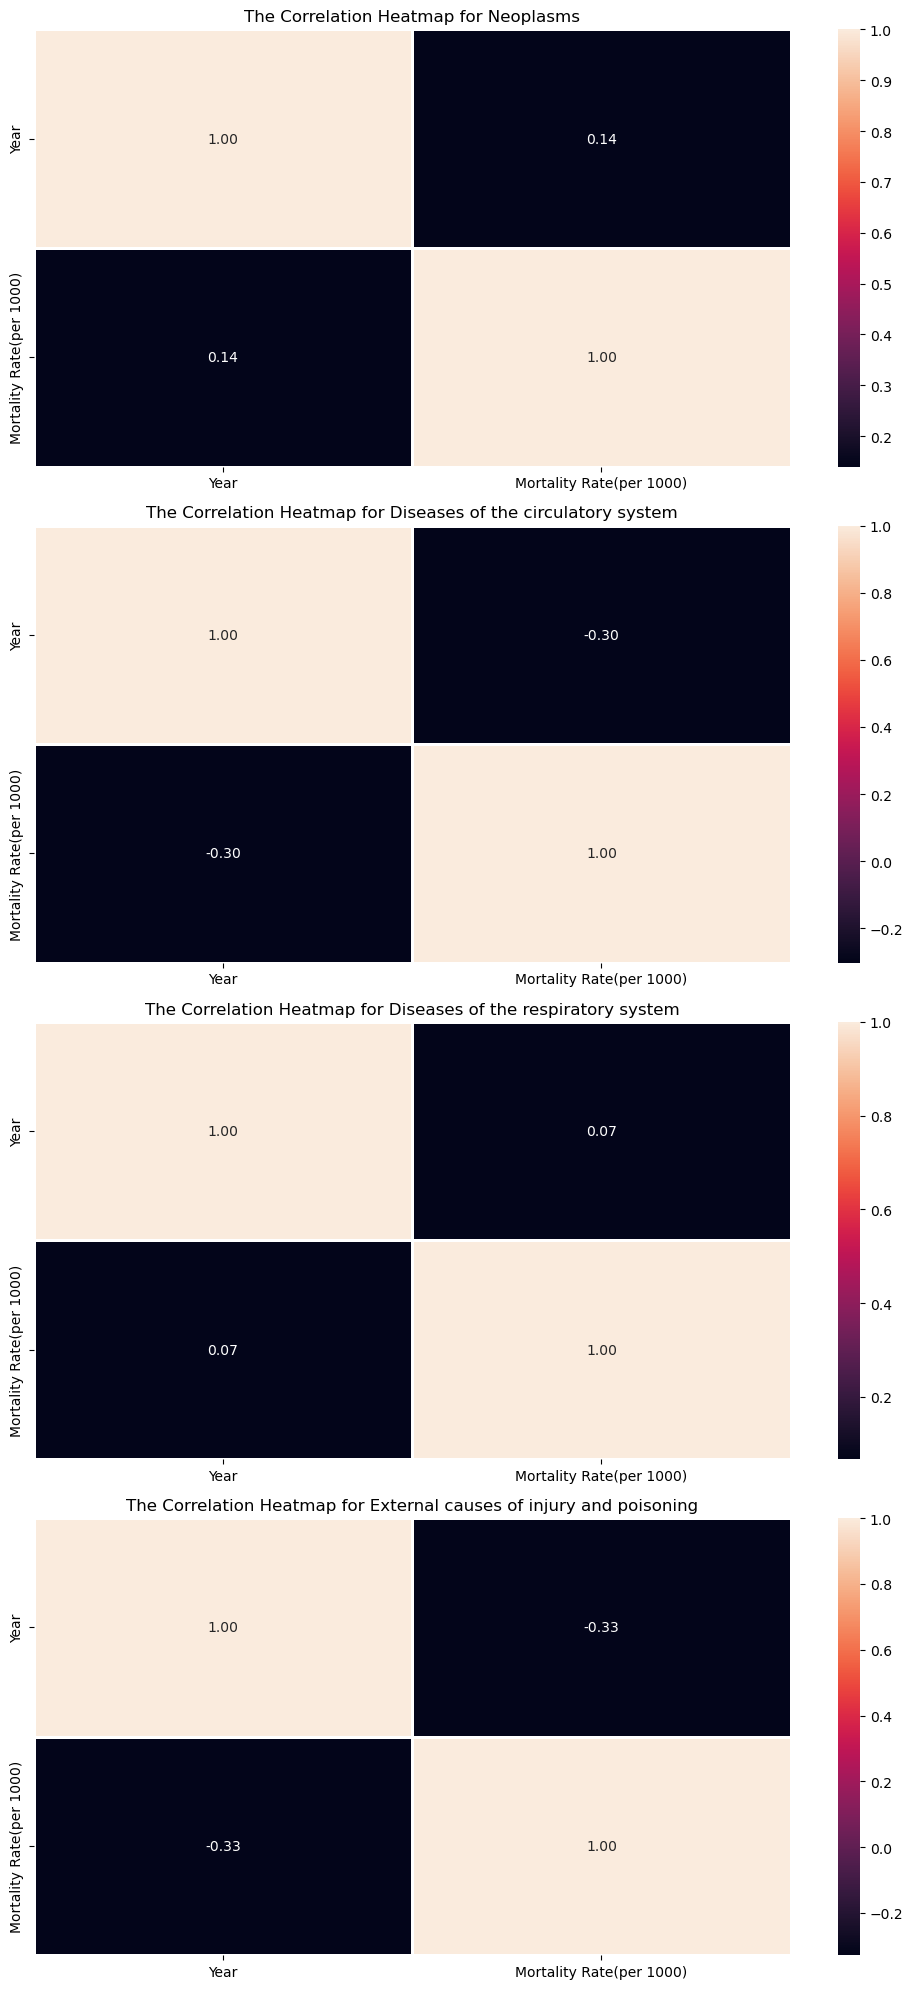

None


In [41]:
# Creating an object for the each of the 4 diseases
each_disease = pop_data['ICD 10 Diagnostic Group'].unique()

#Check length of each disease
eachdisease_length = len(each_disease)

#create subplots for each disease
fig, axes = plt.subplots(eachdisease_length, 1, figsize=(10, 5 * eachdisease_length))

# Iterate over each disease group and plot a heatmap
for i, disease_group in enumerate(each_disease):
    filtered_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease_group] # Filter the data for the current disease group
    
    # Create a heatmap for the correlation within the filtered data
    ax = sns.heatmap(filtered_data.corr(), ax=axes[i], annot=True, fmt='.2f', linewidths=2)
    
    # Set the title for the heatmap based on the disease group
    ax.set_title(f'The Correlation Heatmap for {disease_group}')
    
plt.tight_layout()
plt.show()
print(plt.show())

### Findings
- There is a weak positive correlation (0.14) between Mortality rate and Year for Neoplasms
- There is a weak negative correlation (-0.3) between Mortality rate and year for disease of the circulatory system
- There is a weak positive correlation (0.07) between mortality rate and year for disease of the respiratory system
- There is a weak negative correlation (-0.33) between Mortality rate and year for extrenal causes of injury and poisoning 

# STATISTICAL ANALYSIS
This process involved:-

a) Determining which data analysis and anaytics i performed (Descriptive, Diagnostic, Predictive, and Prescriptive). 

For this data:-
- I used descriptive analysis and anaytics to understand what happened. 
- I used Predictive analysis and analytics to make prediction of the Mortality rate of each ICD Diagnostic group Variable

b) Assess the levels of data measurements of the variables

c) Calculating the measures of central tendecies and dispersion ( mean, median, IQR ranges, frequency)

d) calculating the measures of dispersion
- coefficient of variation
- variance and standard deviation
- check for skewness
- coefficient of skewness
- kurtosis

e) Testing various probabilities.(PMF, CDF)

f) Calculate the probability of having a mortality rate of 2.23 if you have neoplasm

g) Test the different distributions
- uniform, exponential, normal and stndardized normal (for continous variables)
- poison, hypergeometric, bernoulli, binomial (for discrete variables

h) perform inferential statistics
- Test a hypothesis
- perform a chi-square/ t-test distribution

## Calculating the Measures of Central Tendencies and Measures of Dispersion
1. I deteremined the measures of central tendencies and dispersion (mean, median, variance, SD, Frequency, the quantiles) of mortality rate by various variables

### 1. What are the measures of central tendency and dispersion of mortality rate for each ICD Diagnostic group?

In [42]:
# The measures of central tendency of mortality rate by the ICD 10 Diagnostic Group
diagnostic_mortality = pop_data.groupby('ICD 10 Diagnostic Group')['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.5),
    q75=lambda x: x.quantile(0.75),
    maximum='max').reset_index()

# Rename the columns of each measure of central tendency/dispersion
diagnostic_mortality.columns = ['ICD 10 Diagnostic Group','Frequency', 'Mean', 'Variance', 'Std Deviation','Minimum' ,'Q1', 'Q2 (Median)', 'Q3','Maximum']
diagnostic_mortality

,ICD 10 Diagnostic Group,Frequency,Mean,Variance,Std Deviation,Minimum,Q1,Q2 (Median),Q3,Maximum
0,Diseases of the circulatory system,340,2.124000,0.134229,0.366372,1.00,1.91,2.110,2.3125,3.92
1,Diseases of the respiratory system,340,0.796912,0.023269,0.152542,0.35,0.70,0.795,0.8800,1.48
2,External causes of injury and poisoning,340,0.358676,0.011011,0.104933,0.10,0.29,0.350,0.4100,0.75
3,Neoplasms,340,1.926353,0.063087,0.251171,0.93,1.77,1.905,2.0700,2.73


### Findings
- Disease of the circulatory system have the highest mean mortality rate while external causes of injury and poisioning has the lowest mean mortality rate

### 2. What are the measures of central tendency and dispersion for mortality rate for each ICD Diagnostic group for each year?

In [43]:
#Calculate the measures of central tendencies for mortality rates for each ICD 10 Diagnostic group
year_mortality = pop_data.groupby(['Year', 'ICD 10 Diagnostic Group'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.5),
    q75=lambda x: x.quantile(0.75),
    maximum='max').reset_index()

# Rename the columns appropriately
year_mortality.columns = ['Year','ICD 10 Diagnostic Group','Frequency', 'Mean', 'Variance', 'Std Deviation','Minimum' ,'Q1', 'Q2 (Median)', 'Q3','Maximum']
year_mortality

,Year,ICD 10 Diagnostic Group,Frequency,Mean,Variance,Std Deviation,Minimum,Q1,Q2 (Median),Q3,Maximum
0,2007,Diseases of the circulatory system,34,2.314412,0.100007,0.316239,1.68,2.1450,2.310,2.5200,3.37
1,2007,Diseases of the respiratory system,34,0.786765,0.017289,0.131488,0.54,0.6925,0.780,0.8875,1.05
2,2007,External causes of injury and poisoning,34,0.423235,0.011744,0.108369,0.23,0.3300,0.390,0.4900,0.69
3,2007,Neoplasms,34,1.863824,0.035685,0.188905,1.47,1.7350,1.860,1.9450,2.34
4,2008,Diseases of the circulatory system,34,2.385294,0.437147,0.661171,1.00,2.0725,2.430,2.7100,3.92
5,2008,Diseases of the respiratory system,34,0.837941,0.040223,0.200556,0.35,0.7850,0.830,0.9500,1.32
6,2008,External causes of injury and poisoning,34,0.382941,0.008997,0.094853,0.23,0.3100,0.385,0.4275,0.60
7,2008,Neoplasms,34,1.964412,0.146825,0.383178,1.16,1.7325,2.045,2.2500,2.60
8,2009,Diseases of the circulatory system,34,2.155588,0.120195,0.346692,1.12,2.0325,2.155,2.2875,3.05
9,2009,Diseases of the respiratory system,34,0.814412,0.026565,0.162987,0.35,0.7025,0.840,0.9325,1.13


### Plot the mean mortality rate by year for each ICD 10 Diagnostic group

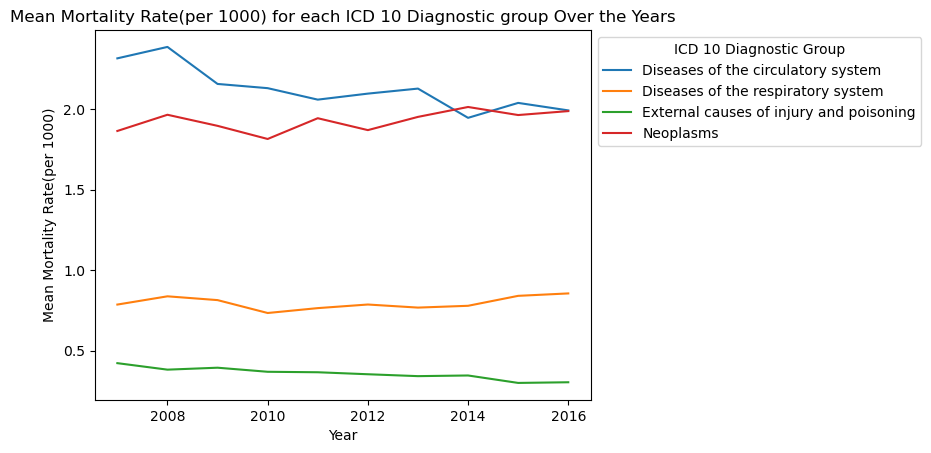

In [44]:
#Group the year_mortality data by ICD 10 diagnostic group and obtain the mean mortality rate for each diagnostic group over the years
diagnosis_data = year_mortality.groupby('ICD 10 Diagnostic Group')

# Iterate through each ICD 10 diagnostic group and create a line chart
for diagnosis, group_data in diagnosis_data:
    plt.plot(group_data['Year'], group_data['Mean'], label=diagnosis)
plt.xlabel('Year')
plt.ylabel('Mean Mortality Rate(per 1000)')
plt.title('Mean Mortality Rate(per 1000) for each ICD 10 Diagnostic group Over the Years')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### 3. What are the measures of central tendency and dispersion for the mortality rate for each ICD Diagnostic group by area of residence?

In [45]:
#The measures of central tendency and dispersion of the mortality rate by Area of residence(code)
area_measures = pop_data.groupby(['Area of Residence'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    Q1=lambda x: x.quantile(0.25),
    Q2_Median=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    maximum='max').reset_index()
area_measures

,Area of Residence,Frequency,mean,variance,SD,minimum,Q1,Q2_Median,Q3,maximum
0,Carlow,40,1.38925,0.662581,0.813991,0.28,0.7050,1.370,2.1175,2.90
1,Cavan,40,1.33250,0.599855,0.774503,0.29,0.6000,1.265,2.0525,2.54
2,Clare,40,1.33600,0.618881,0.786690,0.30,0.6200,1.345,2.0650,2.51
3,Cork City,40,1.52475,0.720338,0.848728,0.44,0.7350,1.490,2.2950,3.08
4,Cork County,40,1.19475,0.529379,0.727585,0.31,0.4650,1.195,1.8800,2.20
5,Donegal,40,1.26000,0.588251,0.766975,0.24,0.5750,1.390,1.9675,2.44
6,Dublin City,40,1.44300,0.696904,0.834808,0.25,0.7025,1.490,2.2325,2.63
7,Dun Laoghaire-Rathdown,40,1.09650,0.478890,0.692019,0.10,0.5325,1.150,1.7425,2.11
8,Fingal,40,1.08075,0.476976,0.690635,0.16,0.3425,0.975,1.6800,2.11
9,Galway City,40,1.04250,0.389414,0.624031,0.21,0.4550,0.915,1.6325,2.06


## Coefficient of Variation 

In [46]:
# Calculate the coefficient of variation (CV) of mortality rate for each ICD 10 diagnostic group using the year_mortality data
year_mortality['Coefficient of Variation'] = (year_mortality['Std Deviation'] / year_mortality['Mean']) * 100

# Group the year_mortality data by ICD 10 Diagnostic group
diagnosis_data = year_mortality.groupby('ICD 10 Diagnostic Group')

# Iterate through each ICD 10 diagnostic group
for diagnosis, group_data in diagnosis_data:
    cv = group_data['Coefficient of Variation'].iloc[0]
    print(f'Diagnosis: {diagnosis}, Coefficient of Variation: {cv:.2f}%')


Diagnosis: Diseases of the circulatory system, Coefficient of Variation: 13.66%
Diagnosis: Diseases of the respiratory system, Coefficient of Variation: 16.71%
Diagnosis: External causes of injury and poisoning, Coefficient of Variation: 25.60%
Diagnosis: Neoplasms, Coefficient of Variation: 10.14%


## A Density Distribution for Mortality rate against the ICD 10 Diagnostic group 

Text(0.5, 0, 'Mortality Rate(per 1000)')

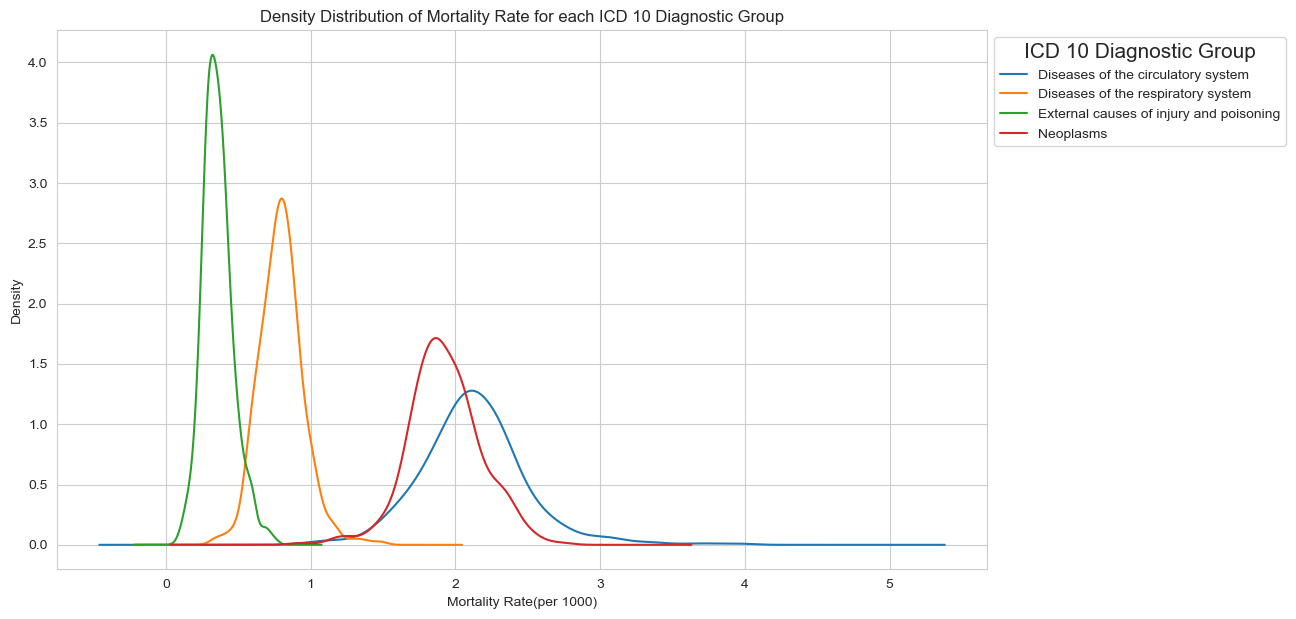

In [47]:
# Sort the pop_data by year and ICD 10 Diagnostic Group in ascending order
pop_data_sorted = pop_data.sort_values(by=['Year','ICD 10 Diagnostic Group'])

# Plot distribution of Mortality Rate(per 1000) by ICD 10 Diagnostic Group
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
pop_data_sorted.groupby('ICD 10 Diagnostic Group')['Mortality Rate(per 1000)'].plot(kind='kde')
plt.title('Density Distribution of Mortality Rate for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Mortality Rate(per 1000)') 

## Histogram and Density plots for Mortality Rates of Each ICD Diagnostic group

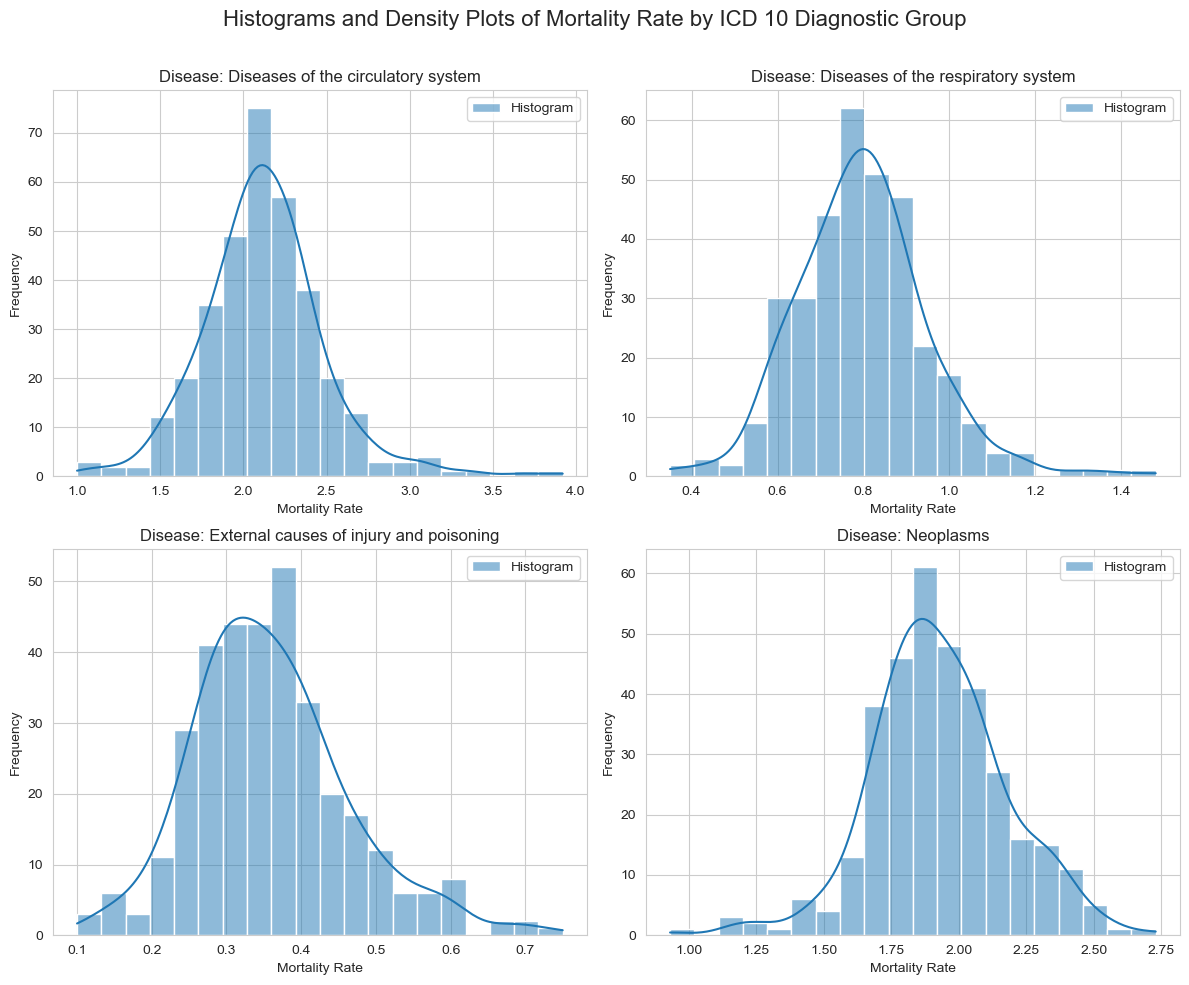

In [48]:
# Group the pop_data by ICD 10 Diagnostic Group
grouped_data = pop_data_sorted.groupby('ICD 10 Diagnostic Group')

# Create a figure with subplots for the ICD 10 Diagnostic group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms and Density Plots of Mortality Rate by ICD 10 Diagnostic Group', fontsize=16)

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Plot histograms and density plots for each disease
for i, (diagnosis, group_data) in enumerate(grouped_data):
    ax = axes[i]

    # Plot the histogram
    sns.histplot(group_data['Mortality Rate(per 1000)'], bins=20, ax=ax, kde=True, label='Histogram')
    ax.set_title(f'Disease: {diagnosis}')
    ax.set_xlabel('Mortality Rate')
    ax.set_ylabel('Frequency')
    ax.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## Skewness and Kurtosis

In [49]:
#Import functions that calculate skewness and kurtosis 
from scipy.stats import skew, kurtosis

# Group pop_data by ICD 10 Diagnostic Group
grouped_data = pop_data.groupby('ICD 10 Diagnostic Group')

# Initialize the lists that will store skewness and kurtosis values
skewness_values = []
kurtosis_values = []

# Calculate the skewness and kurtosis for each ICD 10 Diagnostic group
for diagnosis, group_data in grouped_data:
    skewness = skew(group_data['Mortality Rate(per 1000)'], bias=False)
    kurt = kurtosis(group_data['Mortality Rate(per 1000)'], bias=False)
    skewness_values.append((diagnosis, skewness))
    kurtosis_values.append((diagnosis, kurt))

# Create DataFrames to store the results
skewness_data = pd.DataFrame(skewness_values, columns=['ICD 10 Diagnostic Group', 'Skewness'])
kurtosis_data = pd.DataFrame(kurtosis_values, columns=['ICD 10 Diagnostic Group', 'Kurtosis'])

# Print or further analyze the skewness and kurtosis for each disease
print("Skewness:")
print(skewness_data)

print("\nKurtosis:")
print(kurtosis_data)

Skewness:
                   ICD 10 Diagnostic Group  Skewness
0       Diseases of the circulatory system  0.702973
1       Diseases of the respiratory system  0.549501
2  External causes of injury and poisoning  0.674069
3                                Neoplasms -0.086806

Kurtosis:
                   ICD 10 Diagnostic Group  Kurtosis
0       Diseases of the circulatory system  2.983173
1       Diseases of the respiratory system  1.883663
2  External causes of injury and poisoning  0.950191
3                                Neoplasms  1.049757


# Cummulative Density Function

### CDF for Mortality rate variable for each ICD Diagnostic Group

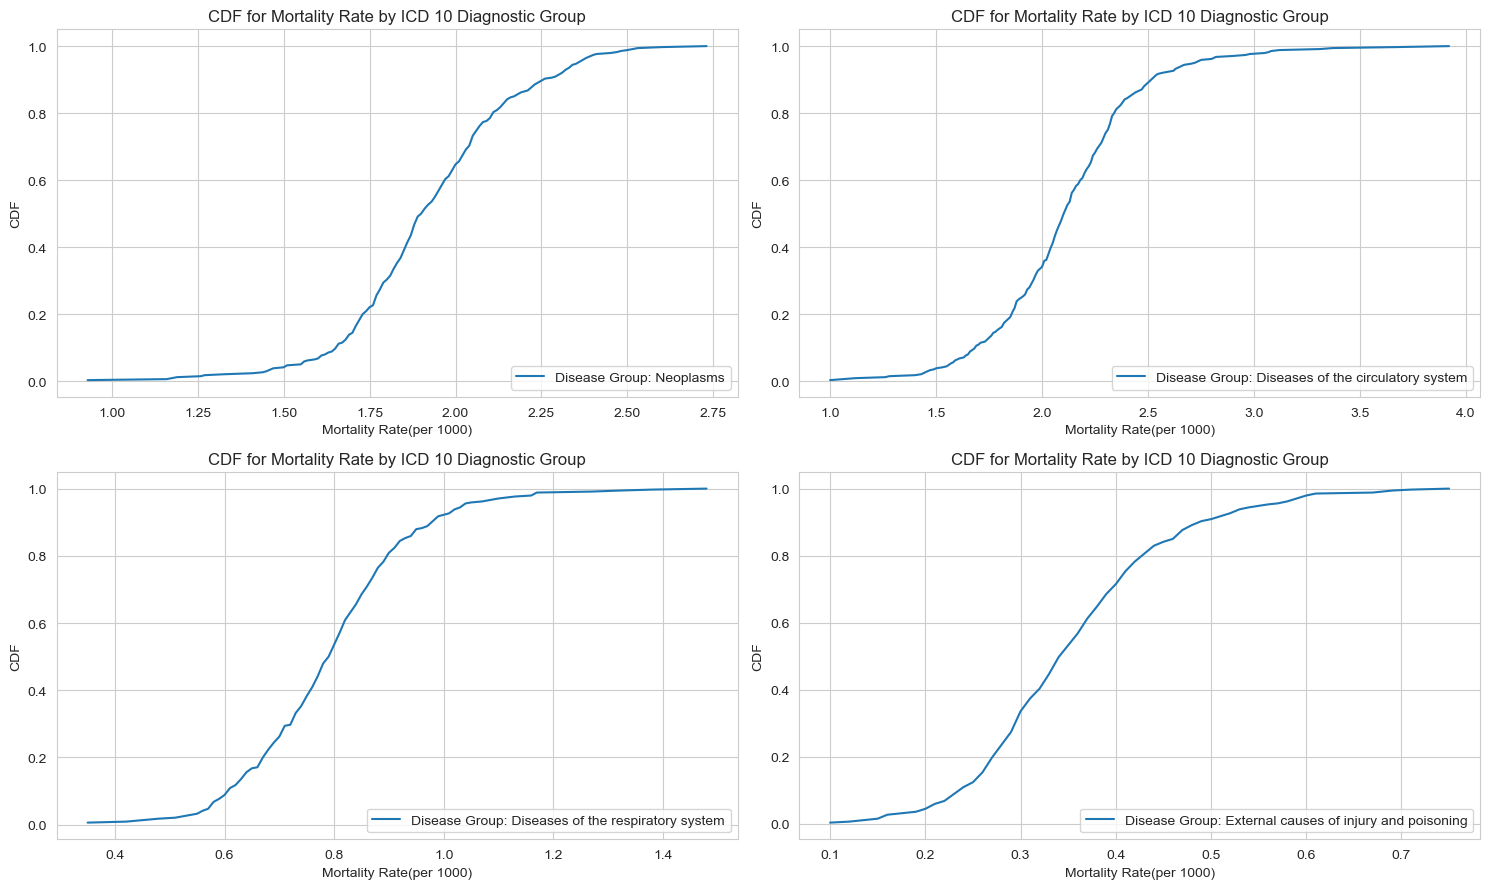

In [50]:
#Import the CDF library
from empiricaldist import Cdf

#Create a dataframe for the unique diseases in the ICD Diagnostic group in pop_data
disease_groups = pop_data['ICD 10 Diagnostic Group'].unique()

#Plot the CDF curves for each ICD Diagnostic Group (disease) mortality rates
plt.figure(figsize=(15, 9))
for i, disease_group in enumerate(disease_groups):
    plt.subplot(2, 2, i + 1) 
    data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease_group]['Mortality Rate(per 1000)']
    cdf = Cdf.from_seq(data)
    cdf.plot(label=f'Disease Group: {disease_group}')
    plt.xlabel('Mortality Rate(per 1000)')
    plt.ylabel('CDF')
    title_text = f'CDF for Mortality Rate by ICD 10 Diagnostic Group'
    plt.title(title_text)
    plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Normality Test of the Variables
There are various normality tests one can perform to determine if a variable is normally distributed. These include:-
- Plotting histograms/Q-Q plots/normal probability plots
- calculating using statistical techniques such as Perform a Shapiro-Wilk Test, If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.
- Perform a Kolmogorov-Smirnov Test, If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

### Normality test using Q-Q Plots

### Q-Q Plots for Mortality rate for each ICD Diagnostic group

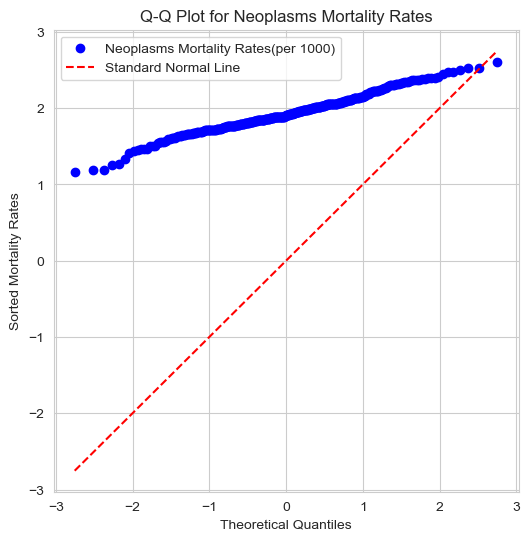

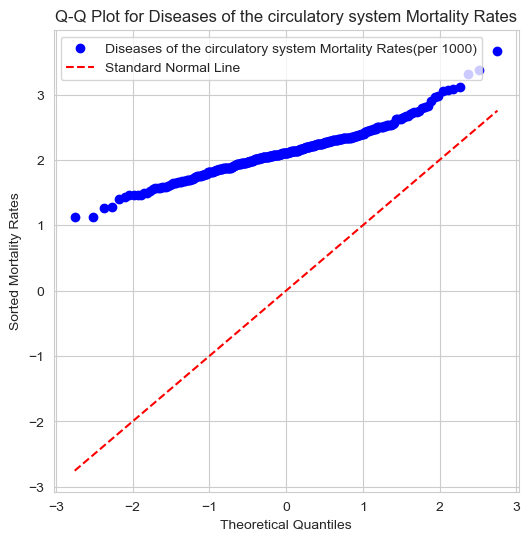

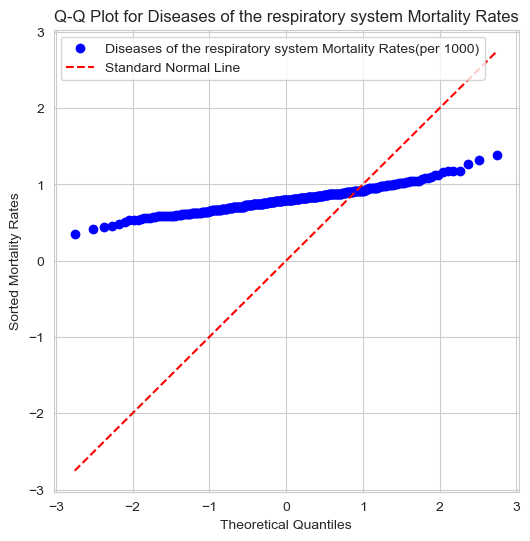

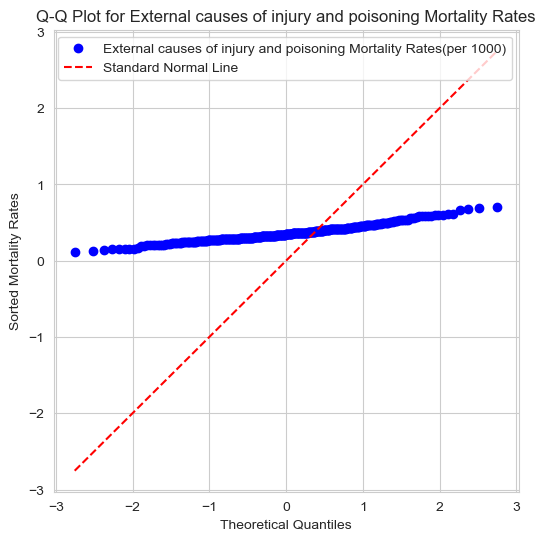

In [51]:
import scipy.stats as stats
#Make the ICD Diagnostic group a list of unique diseases
unique_diseases = pop_data['ICD 10 Diagnostic Group'].unique()

# Create a Q-Q plot for each disease
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Mortality Rate(per 1000)']
    
    # Sort the mortality rates
    sorted_mortality_rates = np.sort(disease_data)
    
    # Generate theoretical quantiles for a standard normal distribution
    theoretical_quantiles = stats.norm.ppf(np.linspace(0, 1, len(sorted_mortality_rates)))
    
    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, sorted_mortality_rates, c='b', marker='o', label=f'{disease} Mortality Rates(per 1000)')
    
    # Add the standard normal line in the plot
    plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', label='Standard Normal Line')
    
    #Labelling the plots
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sorted Mortality Rates')
    plt.title(f'Q-Q Plot for {disease} Mortality Rates')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


### Normality Test using Shapiro-wilk Test

In [52]:
#Kolmogorov-sminorv test for the Mortality Rate(per 1000)
#Import the kolmogorov function
from scipy.stats import kstest 
kstest(pop_data['Mortality Rate(per 1000)'], 'norm')

KstestResult(statistic=0.5740423504361235, pvalue=0.0, statistic_location=0.23, statistic_sign=-1)

### Kolmogorov-Sminorv test for mortality rate for each ICD Diagnostic Group
Set the hypothesis to test:

H0: The Mortality rate variable for each disease does not follow a normal distribution

H1: The mortality rate variable for each disease follows a normal distribution

In [53]:
# Perform Shapiro-Wilk test for mortality rate each ICD Diagnostic Group
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Mortality Rate(per 1000)']
    
    # Perform Shapiro-Wilk test for the current disease group
    stat, p_value = kstest(disease_data, 'norm')
    
    # Print the results
    print(f'Disease: {disease}')
    print(f'Kolmogorov-Sminorv Statistic: {stat}')
    print(f'p-value: {p_value}')
    
    # add a significance level threshold and then intepret the results
    if p_value < 0.05:
        print("The Mortality rate variable follow a normal distribution (reject H0)")
    else:
        print("The Mortality rate variable does not follows a normal distribution (fail to reject H0)")
    
    print('\n')


Disease: Neoplasms
Kolmogorov-Sminorv Statistic: 0.901536888700967
p-value: 0.0
The Mortality rate variable follow a normal distribution (reject H0)


Disease: Diseases of the circulatory system
Kolmogorov-Sminorv Statistic: 0.9072667277399885
p-value: 0.0
The Mortality rate variable follow a normal distribution (reject H0)


Disease: Diseases of the respiratory system
Kolmogorov-Sminorv Statistic: 0.6848132484901843
p-value: 5.047717931003205e-159
The Mortality rate variable follow a normal distribution (reject H0)


Disease: External causes of injury and poisoning
Kolmogorov-Sminorv Statistic: 0.5488535805384918
p-value: 1.1329618711285416e-96
The Mortality rate variable follow a normal distribution (reject H0)




# MACHINE LEARNING
This process involves:
- Encoding the categorical Variables
- Creating the features and dependent variable objects
- Standardising the data
- splitting the data into training and Test set.
- build various ML models
- test the model on a test data set
- Evaluate the model performance
- Maximize the model performance
- Hyperparameter tuning

## Encoding the Features
I used one-hot encoding for the categorical variables, Area of Residence and ICD 10 Diagnostic group. 

one hot encoding does not order the labels

In [56]:
#Encoding the ICD 10 Diagnostic Group Variable
# Import the OneHotEncoder function
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Creating the one-hot-encoder object
Diagnosis_OneHotEncoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the ICD Diagnosis Group
encoder_diagnosis = Diagnosis_OneHotEncoder.fit_transform(pop_data[['ICD 10 Diagnostic Group']])

# Convert the one-hot encoded result to a DataFrame
encoder_diagnosis_df = pd.DataFrame(encoder_diagnosis, columns=Diagnosis_OneHotEncoder.get_feature_names_out(['ICD 10 Diagnostic Group']))

# Merge the encoder_diagnosis_df with the pop_data 
pop_data = pd.concat([pop_data, encoder_diagnosis_df], axis=1)

# View the pop_data to check if the two data frames have been merged
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000),ICD 10 Diagnostic Group_Diseases of the circulatory system,ICD 10 Diagnostic Group_Diseases of the respiratory system,ICD 10 Diagnostic Group_External causes of injury and poisoning,ICD 10 Diagnostic Group_Neoplasms
0,Carlow,Neoplasms,2007,1.91,0.0,0.0,0.0,1.0
1,Carlow,Neoplasms,2008,2.02,0.0,0.0,0.0,1.0
2,Carlow,Neoplasms,2009,2.17,0.0,0.0,0.0,1.0
3,Carlow,Neoplasms,2010,1.72,0.0,0.0,0.0,1.0
4,Carlow,Neoplasms,2011,2.33,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1355,Monaghan,External causes of injury and poisoning,2012,0.44,0.0,0.0,1.0,0.0
1356,Monaghan,External causes of injury and poisoning,2013,0.41,0.0,0.0,1.0,0.0
1357,Monaghan,External causes of injury and poisoning,2014,0.41,0.0,0.0,1.0,0.0
1358,Monaghan,External causes of injury and poisoning,2015,0.37,0.0,0.0,1.0,0.0


In [57]:
#Encoding the Area of Residence Variable
# Creating the one-hot-encoder object
area_OneHotEncoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the ICD Diagnosis Group
encoder_area = area_OneHotEncoder.fit_transform(pop_data[['Area of Residence']])

# Convert the encoder_area to a DataFrame
encoder_area_df = pd.DataFrame(encoder_area, columns=area_OneHotEncoder.get_feature_names_out(['Area of Residence']))

# Merge the encoder_area_df with the pop_data 
pop_data = pd.concat([pop_data, encoder_area_df], axis=1)

# View the pop_data to check if the two data frames have been merged
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000),ICD 10 Diagnostic Group_Diseases of the circulatory system,ICD 10 Diagnostic Group_Diseases of the respiratory system,ICD 10 Diagnostic Group_External causes of injury and poisoning,ICD 10 Diagnostic Group_Neoplasms,Area of Residence_Carlow,Area of Residence_Cavan,...,Area of Residence_Offaly,Area of Residence_Roscommon,Area of Residence_Sligo,Area of Residence_South Dublin,Area of Residence_South Tipperary,Area of Residence_Waterford City,Area of Residence_Waterford County,Area of Residence_Westmeath,Area of Residence_Wexford,Area of Residence_Wicklow
0,Carlow,Neoplasms,2007,1.91,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Carlow,Neoplasms,2008,2.02,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Carlow,Neoplasms,2009,2.17,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Carlow,Neoplasms,2010,1.72,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Carlow,Neoplasms,2011,2.33,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Monaghan,External causes of injury and poisoning,2012,0.44,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1356,Monaghan,External causes of injury and poisoning,2013,0.41,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1357,Monaghan,External causes of injury and poisoning,2014,0.41,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1358,Monaghan,External causes of injury and poisoning,2015,0.37,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
#View the data to view the new one hot encoded variables
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 42 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Area of Residence                                                1360 non-null   object 
 1   ICD 10 Diagnostic Group                                          1360 non-null   object 
 2   Year                                                             1360 non-null   int64  
 3   Mortality Rate(per 1000)                                         1360 non-null   float64
 4   ICD 10 Diagnostic Group_Diseases of the circulatory system       1360 non-null   float64
 5   ICD 10 Diagnostic Group_Diseases of the respiratory system       1360 non-null   float64
 6   ICD 10 Diagnostic Group_External causes of injury and poisoning  1360 non-null   float64
 7   ICD 10 Diagnostic Group_Neoplasms         

In [59]:
#Drop Variables that i'll not use
pop_data = pop_data.drop(["Area of Residence", "ICD 10 Diagnostic Group"], axis = 1)


In [60]:
#View the pop_data after dropping some variables
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 40 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             1360 non-null   int64  
 1   Mortality Rate(per 1000)                                         1360 non-null   float64
 2   ICD 10 Diagnostic Group_Diseases of the circulatory system       1360 non-null   float64
 3   ICD 10 Diagnostic Group_Diseases of the respiratory system       1360 non-null   float64
 4   ICD 10 Diagnostic Group_External causes of injury and poisoning  1360 non-null   float64
 5   ICD 10 Diagnostic Group_Neoplasms                                1360 non-null   float64
 6   Area of Residence_Carlow                                         1360 non-null   float64
 7   Area of Residence_Cavan                   

# Try all possible Regression supervised machine learning models because the target variable is continous.
- KNN
- Decision trees regression (CART)
- Random forest
- Linear regression (multiple)
- Lasso regression
- Ridge regression
- Support Vector regression
- Gaussian Naive Bayes

## Regression Steps followed:-
- Import all necessary libraries
- Train the model (finding the loss function and the parameter that minimizes loss)
- Grid Search(cross validation)

In [61]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

In [62]:
#The dependent and independent variables
y = pop_data.iloc[:, 1].values
X = pop_data.drop('Mortality Rate(per 1000)', axis=1).values

In [63]:
#Print X array
print(X)

[[2007.    0.    0. ...    0.    0.    0.]
 [2008.    0.    0. ...    0.    0.    0.]
 [2009.    0.    0. ...    0.    0.    0.]
 ...
 [2014.    0.    0. ...    0.    0.    0.]
 [2015.    0.    0. ...    0.    0.    0.]
 [2016.    0.    0. ...    0.    0.    0.]]


In [64]:
#print y array
print(y)

[1.91 2.02 2.17 ... 0.41 0.37 0.37]


In [65]:
X.shape, y.shape

((1360, 39), (1360,))

In [66]:
# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(952, 39)
(408, 39)
(952,)
(408,)


## Multiple Linear Regression Model

In [68]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object slr by calling a method named as 'LinearRegression()'
mlr = LinearRegression()

# Fitting the OLS model
mlr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

from statsmodels.tools.eval_measures import mse, rmse
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(mlr.score(X_train, y_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(mlr.score(X_test, y_test)))
print("mean squared error of the prediction is: {}".format(mse(y_test, y_test_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100))

-----Training set statistics-----
R-squared of the model in training set is: 0.9335400644525111
-----Test set statistics-----
R-squared of the model in test set is: 0.936187559562085
mean squared error of the prediction is: 0.04062690839375935
Root mean squared error of the prediction is: 0.2015611777941361
Mean absolute percentage error of the prediction is: 16.507639205646054


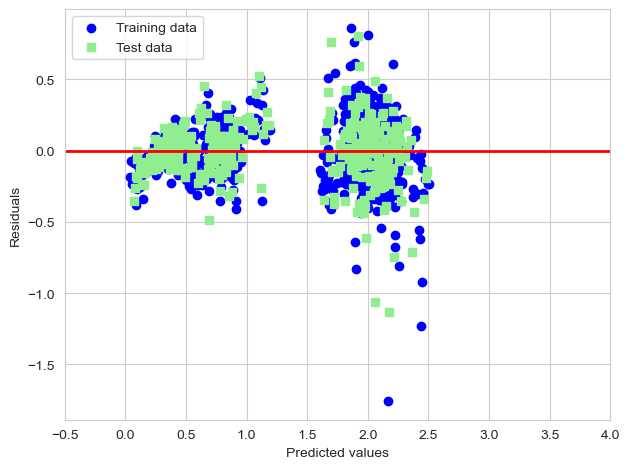

In [69]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -0.5, xmax = 4, lw = 2, color = 'red')
plt.xlim([-0.5, 4])
plt.tight_layout()

plt.show()

### Coefficients of the independent variables

In [70]:
print(mlr.coef_)

[-8.79681160e-03 -3.33013621e+11 -3.33013621e+11 -3.33013621e+11
 -3.33013621e+11 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10
 -1.60022411e+10 -1.60022411e+10 -1.60022411e+10]


## Fitting a robust regression model using RANSAC

In [71]:
#Fitting a robust regression model using RANSAC
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling an object RANSACRegressor()
ransac = RANSACRegressor(mlr, 
                         max_trials = 100, 
                         min_samples = 50,                          
                         residual_threshold = 5.0, 
                         random_state = 0)
ransac.fit(X, y)

# Display the coefficients and intercepts
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: -0.009
Intercept: 461320876659.374


## Decision Tree Regression

In [72]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

# Initialise an object by calling a method DecisionTreeRegressor()
decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)  # You can adjust max_depth as needed

#Pass the training set through the decision_Regressor
decision_Regressor.fit(X_train, y_train)

#Predict the X_test values
y_pred_decision=decision_Regressor.predict(X_test)

from statsmodels.tools.eval_measures import mse, rmse
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(decision_Regressor.score(X_train, y_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_Regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_decision)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_decision) / y_test)) * 100))

-----Training set statistics-----
R-squared of the model in training set is: 0.8942786309604209
-----Test set statistics-----
R-squared of the model in test set is: 0.9056973489133711
Root mean squared error of the prediction is: 0.24502825176089552
Mean absolute percentage error of the prediction is: 16.853705228731204


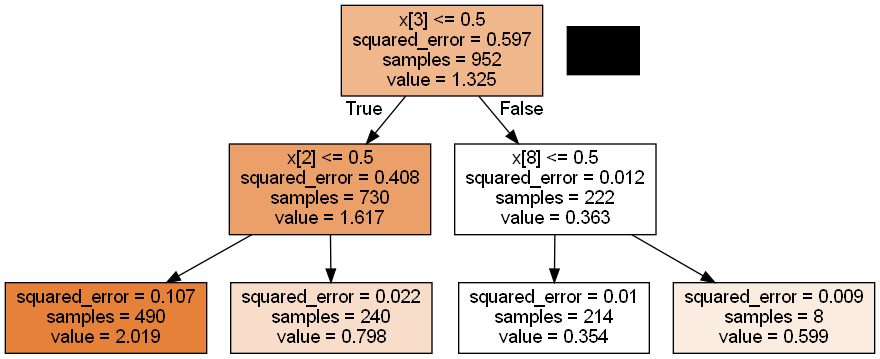

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

# Create a StringIO object to hold the visualization
dot_data = StringIO()

# Export the Decision Tree as a Graphviz dot file
export_graphviz(decision_Regressor, out_file=dot_data, filled=True)

# Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create an Image from the graph
Image(graph.create_png())

# Random Forest Regression

In [74]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest_Regressor = RandomForestRegressor(n_estimators = 1000,random_state=0)

# Train the Model by calling a fit() method
forest_Regressor.fit(X_train, y_train)

#Predict the Test Set
y_pred_random = forest_Regressor.predict(X_test)

#Print the R^2, mse, mean absolute percebtage error
print("R-squared of the model in training set is: {}".format(forest_Regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_Regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_random) / y_test)) * 100))

R-squared of the model in training set is: 0.992019785087224
-----Test set statistics-----
R-squared of the model in test set is: 0.9440095608040877
Root mean squared error of the prediction is: 0.1888039810726267
Mean absolute percentage error of the prediction is: 13.125846376322464


# Ridge Regression

In [75]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge = ridge.predict(X_test)


# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

print("-----Test set statistics (ridge)-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100))

# alpha = 10 is a parameter using a fit() method
ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge_10 = ridge.predict(X_test)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge_10.score(X_train, y_train)))

print("-----Test set statistics (ridge_10)-----")
print("Test set score: {:.2f}".format(ridge_10.score(X_test, y_test)))
print("R-squared of the model in test set is: {}".format(ridge_10.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_ridge_10)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_ridge_10) / y_test)) * 100))


# alpha = 0.1 is a parameter using a fit() method
ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge_01 = ridge.predict(X_test)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge_01.score(X_train, y_train)))

print("-----Test set statistics (ridge_01)-----")
print("R-squared of the model in test set is: {}".format(ridge_01.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_ridge_01)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_ridge_01) / y_test)) * 100))
print("Test set score: {:.2f}".format(ridge_01.score(X_test, y_test)))

Training set score: 0.93
-----Test set statistics (ridge)-----
R-squared of the model in test set is: 0.9362560958830513
Root mean squared error of the prediction is: 0.20145290758304138
Mean absolute percentage error of the prediction is: 16.310044828297286
Training set score: 0.93
-----Test set statistics (ridge_10)-----
Test set score: 0.93
R-squared of the model in test set is: 0.9328166184786929
Root mean squared error of the prediction is: 0.20145290758304138
Mean absolute percentage error of the prediction is: 16.310044828297286
Training set score: 0.93
-----Test set statistics (ridge_01)-----
R-squared of the model in test set is: 0.9362046739034355
Root mean squared error of the prediction is: 0.20145290758304138
Mean absolute percentage error of the prediction is: 16.310044828297286
Test set score: 0.94


## using GridSearchCV for parameter optimization in Ridge Regression

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

# Making predictions here
y_train_pred = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_test_pred_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_pred_ridge) / y_test)) * 100))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
R-squared of the model in training set is: 0.9334853303307666
-----Test set statistics-----
R-squared of the model in test set is: 0.9362560958830513
Root mean squared error of the prediction is: 0.20145290758304138
Mean absolute percentage error of the prediction is: 16.310044828297286


# Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

#prediction
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.00
Test set score: -0.01
Number of features used: 0
Training set score: 0.90
Test set score: 0.91
Number of features used: 6
Training set score: 0.93
Test set score: 0.94
Number of features used: 38


## Using GridSearch Parameter optimization in Lasso Regression

In [78]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
R-squared of the model in training set is: 0.8995533787304926
-----Test set statistics-----
R-squared of the model in test set is: 0.9105018678548308
Root mean squared error of the prediction is: 0.23870482421511685
Mean absolute percentage error of the prediction is: 18.995370980962527


# ElasticNet Regression

In [79]:
# Load library for the ElasticNet
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)

e_net.fit(X_train, y_train)

# Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)

# Calculate the mean_square_error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

# Display the mean square error
print("Mean Squared Error on test set", mean_squared_error)

print(e_net.coef_, e_net.intercept_)

Mean Squared Error on test set 0.6427229893795754
[-0.  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0.
 -0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.
  0. -0. -0.] 1.32484243697479


## support vector Machine Regression

In [80]:
from sklearn.svm import SVR
svr= SVR()

#fit the svr 
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
print("Training set score: {:.2f}".format(svr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svr.score(X_test, y_test)))

Training set score: -0.02
Test set score: -0.05


In [81]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVR(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.842 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.544 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.907 total time=   1.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.961 total time=   0.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.935 total time=   0.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.942 total time=   0.4s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.5s
[CV 5/5] END ....C=1000, gam

0.9469058109684763

## K-Nearest Neighbors

In [82]:
from sklearn.neighbors import KNeighborsRegressor
knn_Regressor = KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5)
knn_Regressor.fit(X_train, y_train)
knn_score = knn_Regressor.score(X_test, y_test)
print("R-squared score on the test data:", knn_score)
print("Training set score: {:.2f}".format(knn_Regressor.score(X_train, y_train)))

R-squared score on the test data: 0.8978883682187679
Training set score: 0.92
